In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import MinMaxScaler

import train

In [2]:
dataset_folder = "../../dataset/"

def refresh_data():
    global artificial_data1
    global artificial_data2
    global msft_data
    global oil_data
    global sp500_data
    global bitcoin_data
    artificial_data1 = pd.read_csv(dataset_folder + "Artificial_trend.csv")
    artificial_data2 = pd.read_csv(dataset_folder + "Artificial_trend1.csv")
    msft_data = pd.read_csv(dataset_folder + "microsoft.csv")
    oil_data = pd.read_csv(dataset_folder + "oil.csv")
    oil_data = oil_data[oil_data.DCOILBRENTEU != "."]
    sp500_data = pd.read_csv(dataset_folder + "sp500.csv")
    bitcoin_data = pd.read_csv(dataset_folder + "coin.csv")

artificial_data1_name = "Artificial Data 1"
artificial_data1_column_i = 1
artificial_data1_date = "date"

artificial_data2_name = "Artificial Data 2"
artificial_data2_column_i = 1
artificial_data2_date = "date"

msft_name = "Microsoft Stock prices"
msft_column_i = 4
msft_date = "Date"

oil_name = "Crude oil prices"
oil_column_i = 1
oil_date = "DATE"

sp500_name = "S&P 500 Index"
sp500_column_i = 1
sp500_date = "Date"

bitcoin_name = "Bitcoin prices"
bitcoin_column_i = 7
bitcoin_date = "Date"

refresh_data()

# Traditional RNN

In [3]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_dim, output_size, n_layers, drop_prob=0.2):
        super(RNN, self).__init__()
        
        #Defining some parameters
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        
        #Defining layers
        #RNN, use dropout to avoid overfitting
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True, dropout=drop_prob)
        #Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_size)
        #activation function, using RELU to prevent shrinking the gradient
        self.relu = nn.ReLU()
    
    def forward(self, x, h):
        out, h = self.rnn(x, h)
        out = self.fc(self.relu(out[:,-1]))
        return out, h
    
    def init_hidden(self,batch_size):
        #generates the first hidden state of zeros used in the forward pass
        weight = next(self.parameters()).data
        hidden = weight.new(self.n_layers, batch_size, self.hidden_dim).zero_()
        return hidden

In [4]:
refresh_data()
network = RNN
model_name = "RNN"

## Artificial Data 1

X_train.shape:  (5842, 5, 1)
y_train.shape:  (5842, 1)
X_test.shape:  (1460, 5, 1)
y_test.shape:  (1460, 1)
Starting Training of RNN model


C:\Users\goodu\AppData\Local\Programs\Python\Python38\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch 1/50 Done, Total Training MSE Loss: 0.03918286020588321
Total Testing MSELoss: 0.010612121783196926
Total Time Elapsed: 0.8826855 seconds

Epoch 2/50 Done, Total Training MSE Loss: 0.0238326946795556
Total Testing MSELoss: 0.012695611454546452
Total Time Elapsed: 0.8495009999999992 seconds

Epoch 3/50 Done, Total Training MSE Loss: 0.016298715466781195
Total Testing MSELoss: 0.008613896556198597
Total Time Elapsed: 0.8148704999999996 seconds

Epoch 4/50 Done, Total Training MSE Loss: 0.0072773709711487595
Total Testing MSELoss: 2.8830403607571498e-05
Total Time Elapsed: 0.8256617999999998 seconds

Epoch 5/50 Done, Total Training MSE Loss: 0.0027398078276306918
Total Testing MSELoss: 0.014086555689573288
Total Time Elapsed: 0.7903485999999997 seconds

Epoch 6/50 Done, Total Training MSE Loss: 0.002208299512778547
Total Testing MSELoss: 0.001509008347056806
Total Time Elapsed: 0.8026461000000005 seconds

Epoch 7/50 Done, Total Training MSE Loss: 0.0009324072184076962
Total Testing 

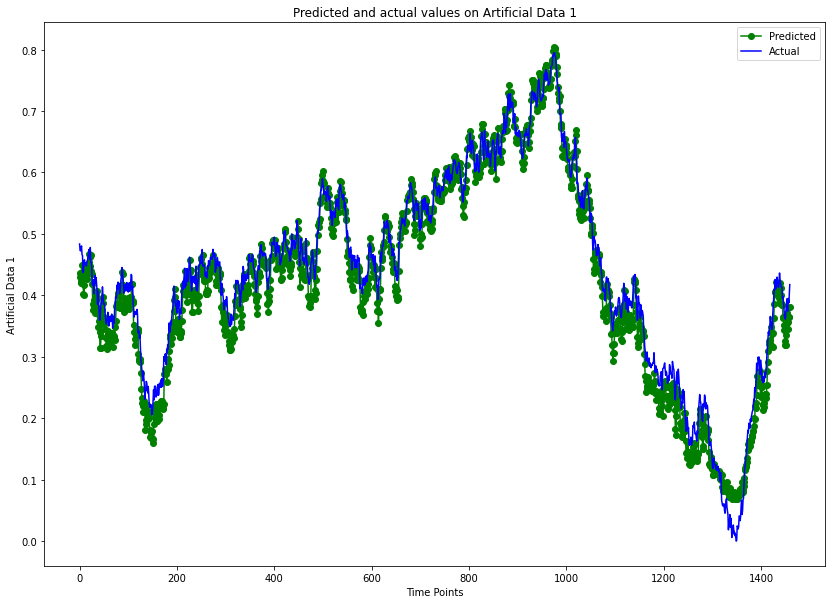

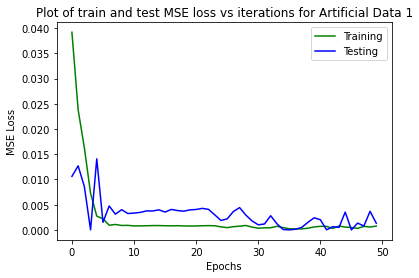

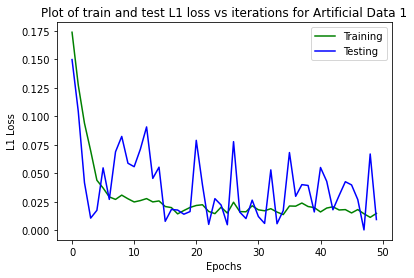

In [5]:
train.run(artificial_data1, artificial_data1_column_i, artificial_data1_name, artificial_data1_date, network, model_name)

## Artificial Data 2

X_train.shape:  (5842, 5, 1)
y_train.shape:  (5842, 1)
X_test.shape:  (1460, 5, 1)
y_test.shape:  (1460, 1)
Starting Training of RNN model


C:\Users\goodu\AppData\Local\Programs\Python\Python38\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch 1/50 Done, Total Training MSE Loss: 0.03729679896307541
Total Testing MSELoss: 0.15283578634262085
Total Time Elapsed: 0.8546266999999972 seconds

Epoch 2/50 Done, Total Training MSE Loss: 0.021431188814768666
Total Testing MSELoss: 0.10726707428693771
Total Time Elapsed: 0.8116165999999936 seconds

Epoch 3/50 Done, Total Training MSE Loss: 0.013945199477238131
Total Testing MSELoss: 0.05941573530435562
Total Time Elapsed: 0.7754989000000023 seconds

Epoch 4/50 Done, Total Training MSE Loss: 0.006333283211790911
Total Testing MSELoss: 0.006276988424360752
Total Time Elapsed: 0.8172620999999936 seconds

Epoch 5/50 Done, Total Training MSE Loss: 0.000803192973422823
Total Testing MSELoss: 0.005256758537143469
Total Time Elapsed: 0.8051286999999974 seconds

Epoch 6/50 Done, Total Training MSE Loss: 0.000598970423407781
Total Testing MSELoss: 0.004710008855909109
Total Time Elapsed: 0.8189358999999996 seconds

Epoch 7/50 Done, Total Training MSE Loss: 0.0006292906724451274
Total Test

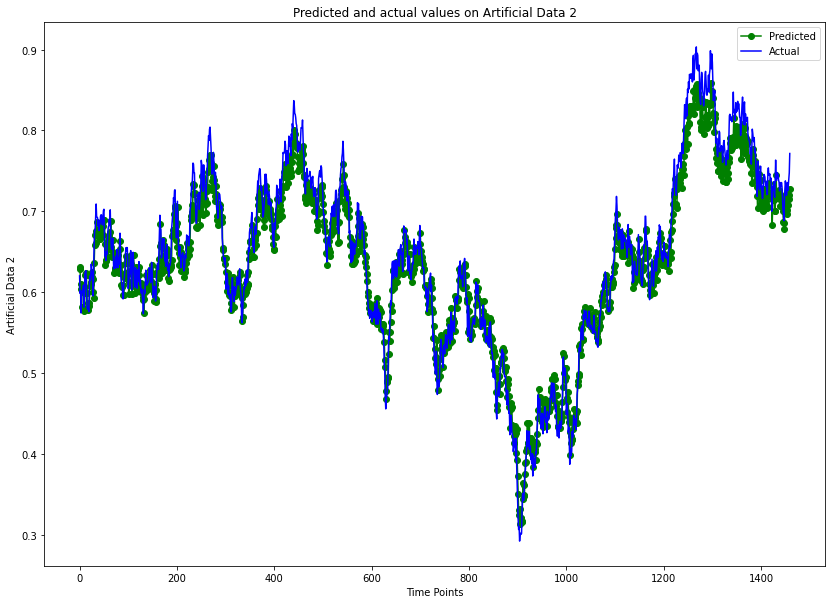

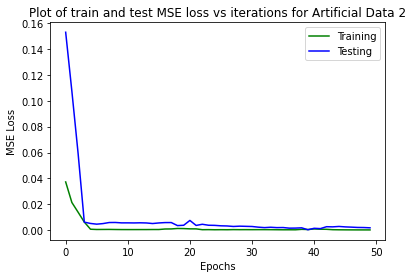

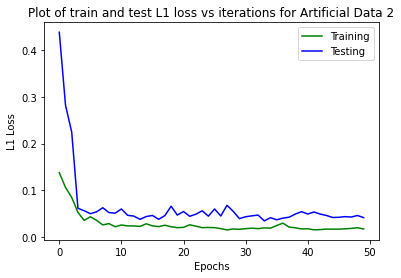

In [6]:
train.run(artificial_data2, artificial_data2_column_i, artificial_data2_name, artificial_data2_date, network, model_name)

## Microsoft Stock Price

X_train.shape:  (1205, 5, 1)
y_train.shape:  (1205, 1)
X_test.shape:  (301, 5, 1)
y_test.shape:  (301, 1)
Starting Training of RNN model
Epoch 1/50 Done, Total Training MSE Loss: 0.001990141243712404
Total Testing MSELoss: 0.188581183552742
Total Time Elapsed: 0.16844140000000607 seconds



C:\Users\goodu\AppData\Local\Programs\Python\Python38\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch 2/50 Done, Total Training MSE Loss: 0.051578073823514606
Total Testing MSELoss: 0.46432504057884216
Total Time Elapsed: 0.16671320000000378 seconds

Epoch 3/50 Done, Total Training MSE Loss: 0.021016611956371424
Total Testing MSELoss: 0.2850964665412903
Total Time Elapsed: 0.1665262999999868 seconds

Epoch 4/50 Done, Total Training MSE Loss: 0.02549426964076308
Total Testing MSELoss: 0.28298527002334595
Total Time Elapsed: 0.16180219999998258 seconds

Epoch 5/50 Done, Total Training MSE Loss: 0.027541667533876386
Total Testing MSELoss: 0.3001731336116791
Total Time Elapsed: 0.1683117999999979 seconds

Epoch 6/50 Done, Total Training MSE Loss: 0.015244331652521962
Total Testing MSELoss: 0.1487291306257248
Total Time Elapsed: 0.17030740000001288 seconds

Epoch 7/50 Done, Total Training MSE Loss: 0.011590942041174139
Total Testing MSELoss: 0.051967523992061615
Total Time Elapsed: 0.16099879999998734 seconds

Epoch 8/50 Done, Total Training MSE Loss: 0.006265716072522156
Total Testin

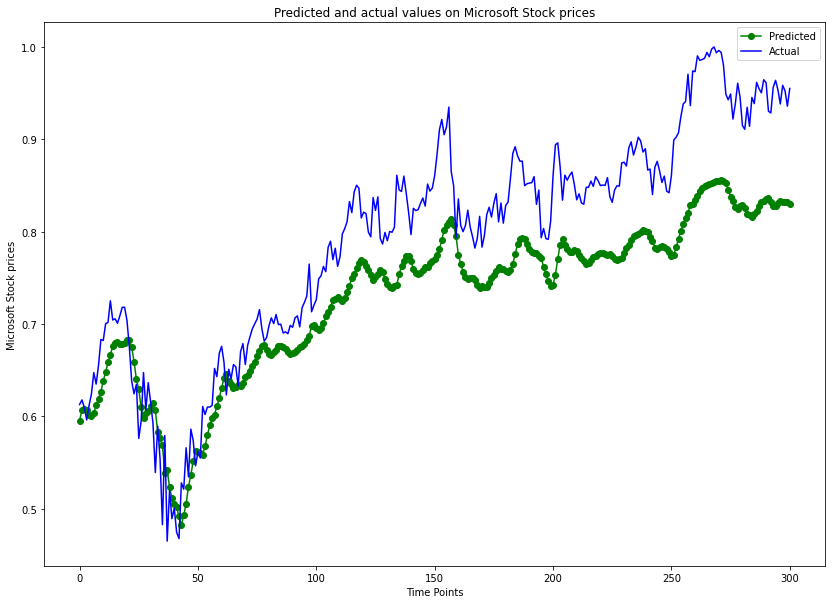

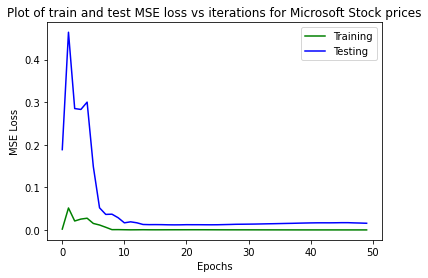

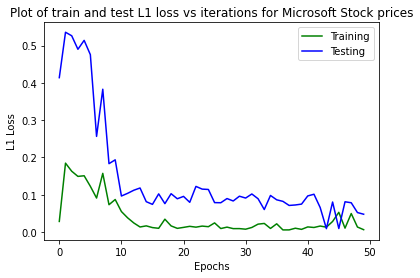

In [7]:
train.run(msft_data, msft_column_i, msft_name, msft_date, network, model_name)

## Crude oil price

X_train.shape:  (1219, 5, 1)
y_train.shape:  (1219, 1)
X_test.shape:  (305, 5, 1)
y_test.shape:  (305, 1)
Starting Training of RNN model
Epoch 1/50 Done, Total Training MSE Loss: 0.025195854651668157
Total Testing MSELoss: 0.2301650494337082
Total Time Elapsed: 0.17571839999999384 seconds



C:\Users\goodu\AppData\Local\Programs\Python\Python38\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch 2/50 Done, Total Training MSE Loss: 0.033810489743604864
Total Testing MSELoss: 0.21134518086910248
Total Time Elapsed: 0.16917619999998124 seconds

Epoch 3/50 Done, Total Training MSE Loss: 0.021535293428123145
Total Testing MSELoss: 0.20260004699230194
Total Time Elapsed: 0.1677323000000115 seconds

Epoch 4/50 Done, Total Training MSE Loss: 0.030199919520926318
Total Testing MSELoss: 0.12525951862335205
Total Time Elapsed: 0.17304910000001428 seconds

Epoch 5/50 Done, Total Training MSE Loss: 0.02680537968530859
Total Testing MSELoss: 0.1402467042207718
Total Time Elapsed: 0.17352919999999017 seconds

Epoch 6/50 Done, Total Training MSE Loss: 0.033791882116546684
Total Testing MSELoss: 0.06615352630615234
Total Time Elapsed: 0.16452920000000404 seconds

Epoch 7/50 Done, Total Training MSE Loss: 0.03131403518675238
Total Testing MSELoss: 0.07201946526765823
Total Time Elapsed: 0.16751089999999635 seconds

Epoch 8/50 Done, Total Training MSE Loss: 0.034972575396654736
Total Testi

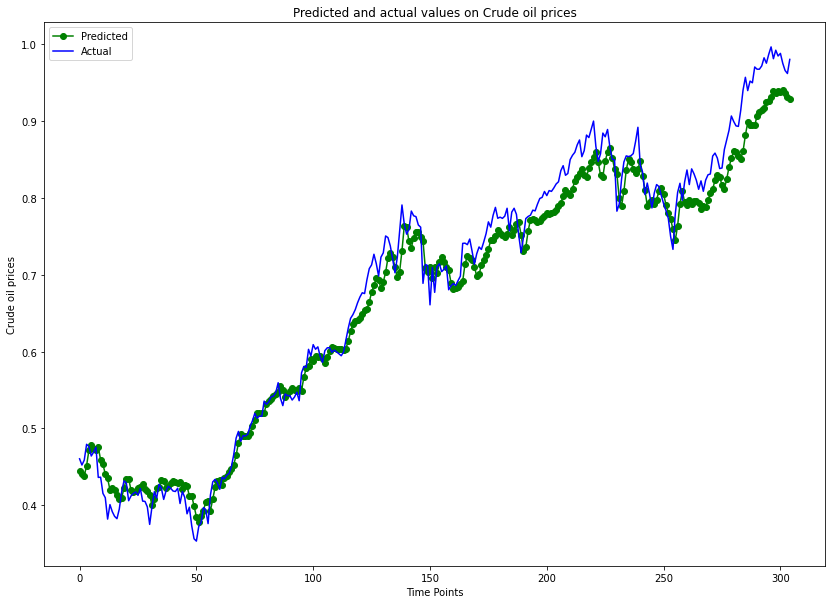

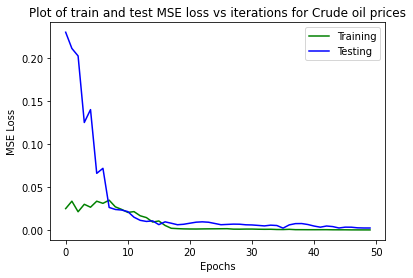

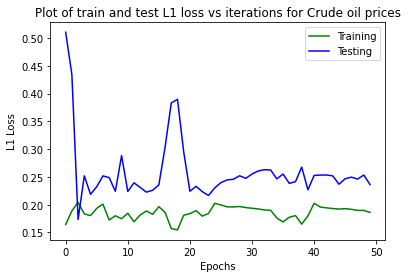

In [8]:
train.run(oil_data, oil_column_i, oil_name, oil_date, network, model_name)

## S&P 500 Index

X_train.shape:  (1410, 5, 1)
y_train.shape:  (1410, 1)
X_test.shape:  (353, 5, 1)
y_test.shape:  (353, 1)
Starting Training of RNN model
Epoch 1/50 Done, Total Training MSE Loss: 0.0001647417733582043


C:\Users\goodu\AppData\Local\Programs\Python\Python38\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Total Testing MSELoss: 0.7704684734344482
Total Time Elapsed: 0.19700299999999515 seconds

Epoch 2/50 Done, Total Training MSE Loss: 0.00039928652960018564
Total Testing MSELoss: 0.7551648616790771
Total Time Elapsed: 0.1923772000000099 seconds

Epoch 3/50 Done, Total Training MSE Loss: 0.0005404077424538463
Total Testing MSELoss: 0.7727916240692139
Total Time Elapsed: 0.211085799999978 seconds

Epoch 4/50 Done, Total Training MSE Loss: 0.00046411979458582664
Total Testing MSELoss: 0.7284614443778992
Total Time Elapsed: 0.19623260000000187 seconds

Epoch 5/50 Done, Total Training MSE Loss: 0.0004369945436378102
Total Testing MSELoss: 0.7070313096046448
Total Time Elapsed: 0.19051279999999338 seconds

Epoch 6/50 Done, Total Training MSE Loss: 0.0004356765181538239
Total Testing MSELoss: 0.7135939002037048
Total Time Elapsed: 0.20245819999999526 seconds

Epoch 7/50 Done, Total Training MSE Loss: 0.0004952269146667667
Total Testing MSELoss: 0.7020493149757385
Total Time Elapsed: 0.1944285

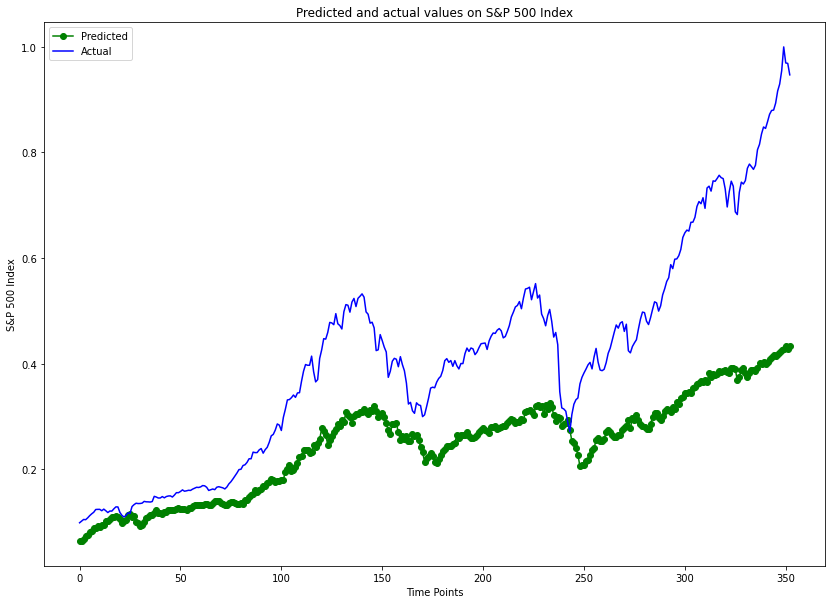

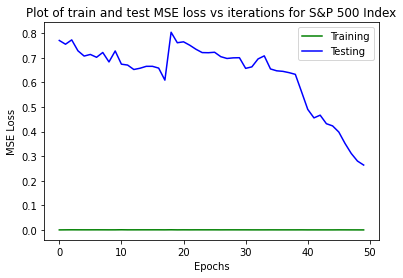

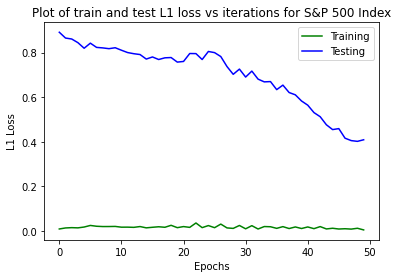

In [9]:
train.run(sp500_data, sp500_column_i, sp500_name, sp500_date, network, model_name)

## Bitcoin price

X_train.shape:  (2389, 5, 1)
y_train.shape:  (2389, 1)
X_test.shape:  (597, 5, 1)
y_test.shape:  (597, 1)
Starting Training of RNN model
Epoch 1/50 Done, Total Training MSE Loss: 0.0024319288539501635


C:\Users\goodu\AppData\Local\Programs\Python\Python38\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Total Testing MSELoss: 0.21015404164791107
Total Time Elapsed: 0.36813150000000405 seconds

Epoch 2/50 Done, Total Training MSE Loss: 0.0031574690727120586
Total Testing MSELoss: 0.18625253438949585
Total Time Elapsed: 0.3216291999999896 seconds

Epoch 3/50 Done, Total Training MSE Loss: 0.002428917485143091
Total Testing MSELoss: 0.18115879595279694
Total Time Elapsed: 0.3290255000000002 seconds

Epoch 4/50 Done, Total Training MSE Loss: 0.002103208694174748
Total Testing MSELoss: 0.1687818020582199
Total Time Elapsed: 0.32026350000001 seconds

Epoch 5/50 Done, Total Training MSE Loss: 0.0028579952181521425
Total Testing MSELoss: 0.1549113243818283
Total Time Elapsed: 0.3223952999999824 seconds

Epoch 6/50 Done, Total Training MSE Loss: 0.0027398183711691724
Total Testing MSELoss: 0.22901234030723572
Total Time Elapsed: 0.32841880000000856 seconds

Epoch 7/50 Done, Total Training MSE Loss: 0.002256796141890875
Total Testing MSELoss: 0.1501888781785965
Total Time Elapsed: 0.32387380000

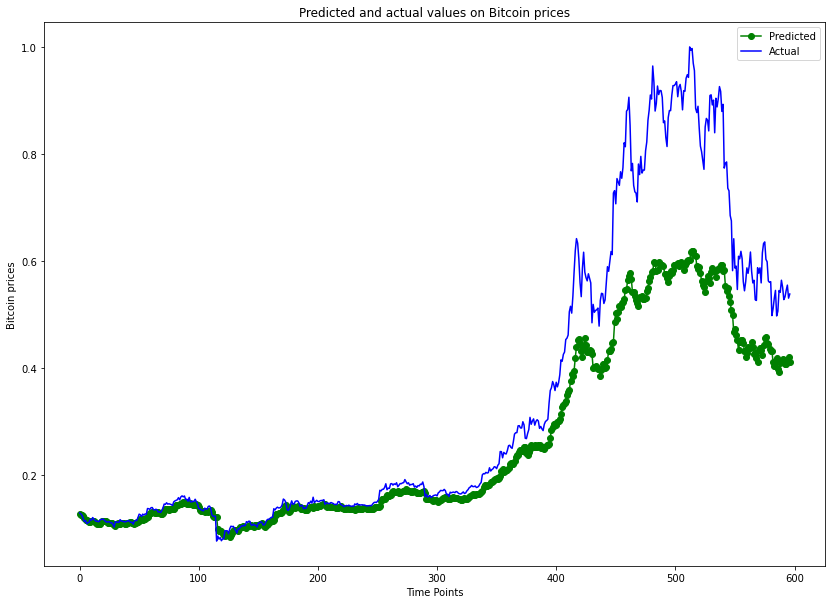

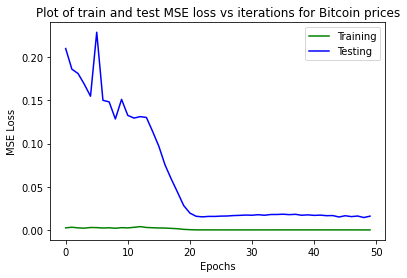

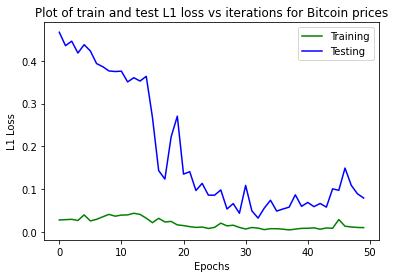

In [10]:
train.run(bitcoin_data, bitcoin_column_i, bitcoin_name, bitcoin_date, network, model_name)

# Bidirectional RNN

In [11]:
class biRNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(biRNN, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.biRNN = nn.RNN(input_dim, hidden_dim, num_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_dim*2, output_dim)

    def forward(self, x, h):
        # h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_dim).requires_grad_()
        # c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, h = self.biRNN(x, h)
        out = self.fc(out[:, -1, :]) 
        return out, h

    def init_hidden(self, batch_size):
        #generates the first hidden state of zeros used in the forward pass
        weight = next(self.parameters()).data
        hidden = weight.new(self.num_layers*2, batch_size, self.hidden_dim).zero_()
        return hidden

In [12]:
refresh_data()
network = biRNN
model_name = "Bidirectional RNN"

## Artificial Data 1

X_train.shape:  (5842, 5, 1)
y_train.shape:  (5842, 1)
X_test.shape:  (1460, 5, 1)
y_test.shape:  (1460, 1)
Starting Training of Bidirectional RNN model
Epoch 1/50 Done, Total Training MSE Loss: 0.027367503216837476
Total Testing MSELoss: 0.004133003298193216
Total Time Elapsed: 1.1047462000000223 seconds

Epoch 2/50 Done, Total Training MSE Loss: 0.007183449751579786
Total Testing MSELoss: 8.128999979817308e-07
Total Time Elapsed: 1.0856153999999947 seconds

Epoch 3/50 Done, Total Training MSE Loss: 0.0014356406683653624
Total Testing MSELoss: 0.0010437691817060113
Total Time Elapsed: 1.1012939000000301 seconds

Epoch 4/50 Done, Total Training MSE Loss: 0.0005379957705832107
Total Testing MSELoss: 0.00028108415426686406
Total Time Elapsed: 1.1112931000000117 seconds

Epoch 5/50 Done, Total Training MSE Loss: 0.0003520513523803707
Total Testing MSELoss: 7.836116128601134e-05
Total Time Elapsed: 1.133925099999999 seconds

Epoch 6/50 Done, Total Training MSE Loss: 0.0003837262204167648
T

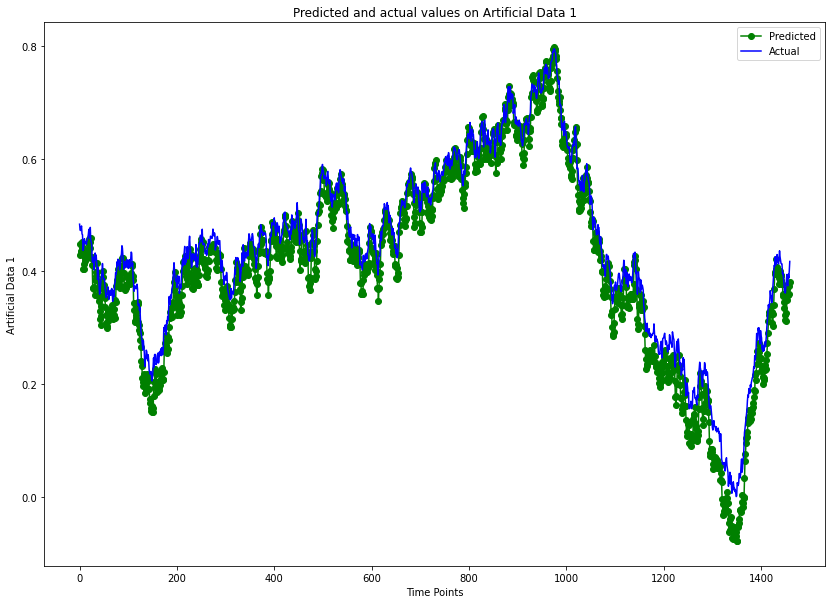

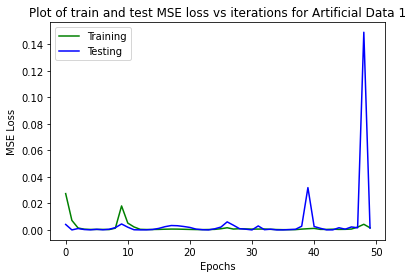

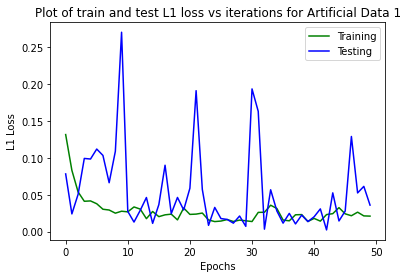

In [13]:
train.run(artificial_data1, artificial_data1_column_i, artificial_data1_name, artificial_data1_date, network, model_name)

## Artificial Data 2

X_train.shape:  (5842, 5, 1)
y_train.shape:  (5842, 1)
X_test.shape:  (1460, 5, 1)
y_test.shape:  (1460, 1)
Starting Training of Bidirectional RNN model
Epoch 1/50 Done, Total Training MSE Loss: 0.02828430709560852
Total Testing MSELoss: 0.07622581720352173
Total Time Elapsed: 1.120769800000005 seconds

Epoch 2/50 Done, Total Training MSE Loss: 0.010403390235816394
Total Testing MSELoss: 0.008069447241723537
Total Time Elapsed: 1.1295640000000162 seconds

Epoch 3/50 Done, Total Training MSE Loss: 0.0027165627991332887
Total Testing MSELoss: 0.0029744142666459084
Total Time Elapsed: 1.1002471000000469 seconds

Epoch 4/50 Done, Total Training MSE Loss: 0.0009875921941084715
Total Testing MSELoss: 0.0017677817959338427
Total Time Elapsed: 1.1002935999999863 seconds

Epoch 5/50 Done, Total Training MSE Loss: 0.0007348961806421138
Total Testing MSELoss: 0.0017390197608619928
Total Time Elapsed: 1.1020255000000247 seconds

Epoch 6/50 Done, Total Training MSE Loss: 0.0009357635946279126
Total

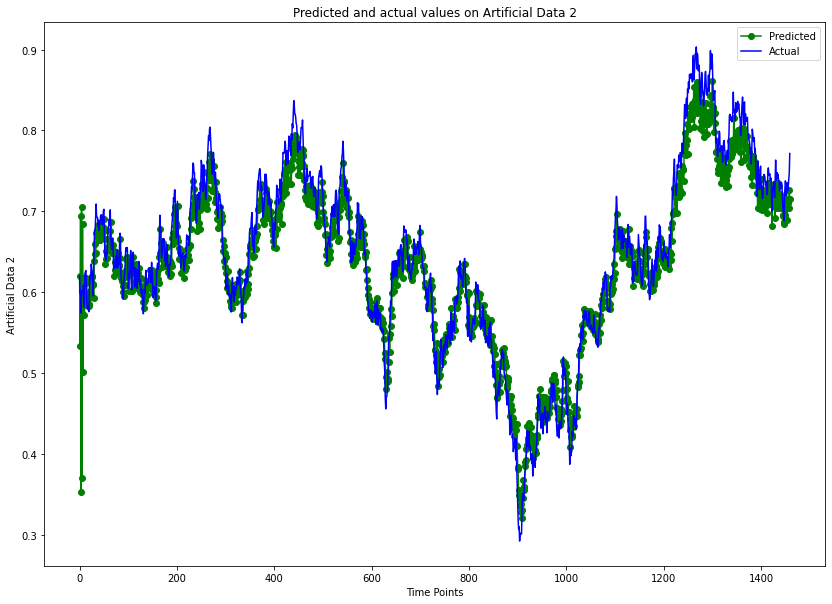

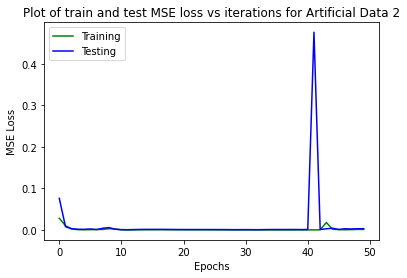

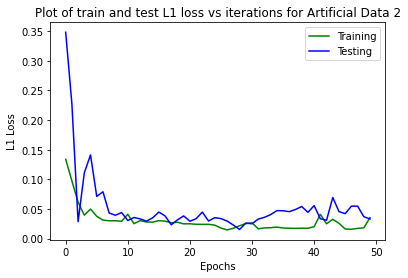

In [14]:
train.run(artificial_data2, artificial_data2_column_i, artificial_data2_name, artificial_data2_date, network, model_name)

## Microsoft Stock Price

X_train.shape:  (1205, 5, 1)
y_train.shape:  (1205, 1)
X_test.shape:  (301, 5, 1)
y_test.shape:  (301, 1)
Starting Training of Bidirectional RNN model
Epoch 1/50 Done, Total Training MSE Loss: 0.002377794938208378
Total Testing MSELoss: 0.16080254316329956
Total Time Elapsed: 0.23700779999995802 seconds

Epoch 2/50 Done, Total Training MSE Loss: 0.027125816185395484
Total Testing MSELoss: 0.09377437084913254
Total Time Elapsed: 0.24253279999999222 seconds

Epoch 3/50 Done, Total Training MSE Loss: 0.0345667213079798
Total Testing MSELoss: 0.1703510582447052
Total Time Elapsed: 0.23459270000000743 seconds

Epoch 4/50 Done, Total Training MSE Loss: 0.02545816759929703
Total Testing MSELoss: 0.17711053788661957
Total Time Elapsed: 0.2291455999999812 seconds

Epoch 5/50 Done, Total Training MSE Loss: 0.013236724827800424
Total Testing MSELoss: 0.07185148447751999
Total Time Elapsed: 0.24971719999996367 seconds

Epoch 6/50 Done, Total Training MSE Loss: 0.005583356090052827
Total Testing MS

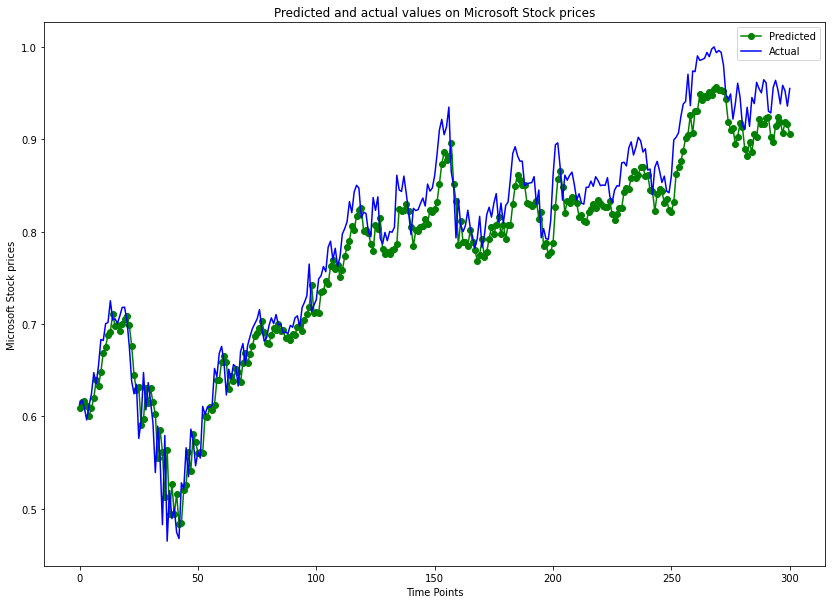

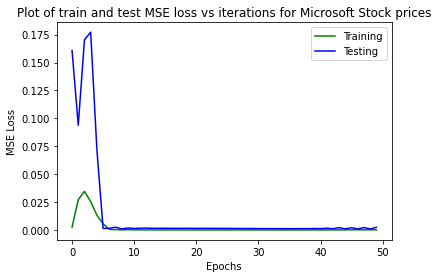

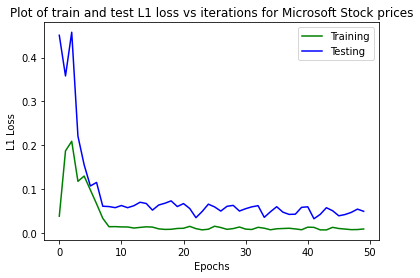

In [15]:
train.run(msft_data, msft_column_i, msft_name, msft_date, network, model_name)

## Crude oil price

X_train.shape:  (1219, 5, 1)
y_train.shape:  (1219, 1)
X_test.shape:  (305, 5, 1)
y_test.shape:  (305, 1)
Starting Training of Bidirectional RNN model
Epoch 1/50 Done, Total Training MSE Loss: 0.02771928127683503
Total Testing MSELoss: 0.159293994307518
Total Time Elapsed: 0.2507779000000028 seconds

Epoch 2/50 Done, Total Training MSE Loss: 0.030456503510083024
Total Testing MSELoss: 0.12268554419279099
Total Time Elapsed: 0.2517447999999831 seconds

Epoch 3/50 Done, Total Training MSE Loss: 0.03503515188104326
Total Testing MSELoss: 0.0725187286734581
Total Time Elapsed: 0.23881059999996523 seconds

Epoch 4/50 Done, Total Training MSE Loss: 0.03218903582532412
Total Testing MSELoss: 0.06449108570814133
Total Time Elapsed: 0.24563430000000608 seconds

Epoch 5/50 Done, Total Training MSE Loss: 0.029840352774236203
Total Testing MSELoss: 0.031239405274391174
Total Time Elapsed: 0.23949229999999488 seconds

Epoch 6/50 Done, Total Training MSE Loss: 0.03518694243087482
Total Testing MSELo

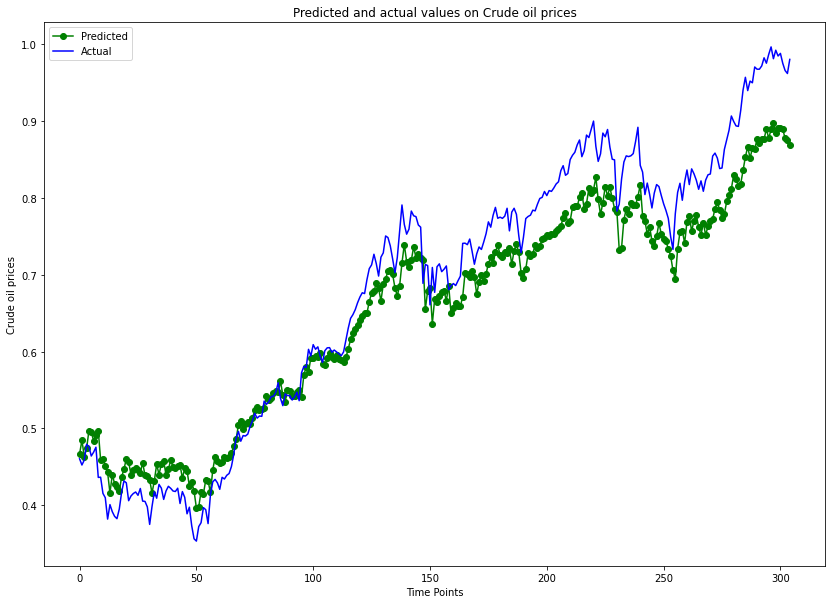

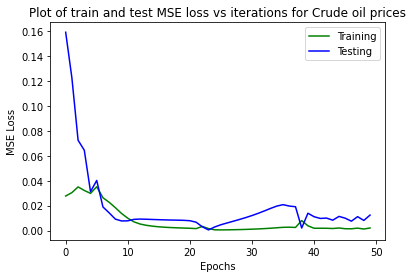

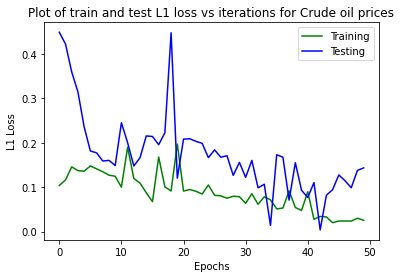

In [16]:
train.run(oil_data, oil_column_i, oil_name, oil_date, network, model_name)

## S&P 500 Index

X_train.shape:  (1410, 5, 1)
y_train.shape:  (1410, 1)
X_test.shape:  (353, 5, 1)
y_test.shape:  (353, 1)
Starting Training of Bidirectional RNN model
Epoch 1/50 Done, Total Training MSE Loss: 0.0003109487646135924
Total Testing MSELoss: 0.6801177859306335
Total Time Elapsed: 0.29352689999996073 seconds

Epoch 2/50 Done, Total Training MSE Loss: 0.000499565562568643
Total Testing MSELoss: 0.6498817205429077
Total Time Elapsed: 0.30628300000000763 seconds

Epoch 3/50 Done, Total Training MSE Loss: 0.000454344008248468
Total Testing MSELoss: 0.6336290836334229
Total Time Elapsed: 0.29076759999998103 seconds

Epoch 4/50 Done, Total Training MSE Loss: 0.00039296126473299285
Total Testing MSELoss: 0.5986467599868774
Total Time Elapsed: 0.280944599999998 seconds

Epoch 5/50 Done, Total Training MSE Loss: 0.0003828759331816074
Total Testing MSELoss: 0.5914657115936279
Total Time Elapsed: 0.277314199999978 seconds

Epoch 6/50 Done, Total Training MSE Loss: 0.00040625778729008744
Total Testing 

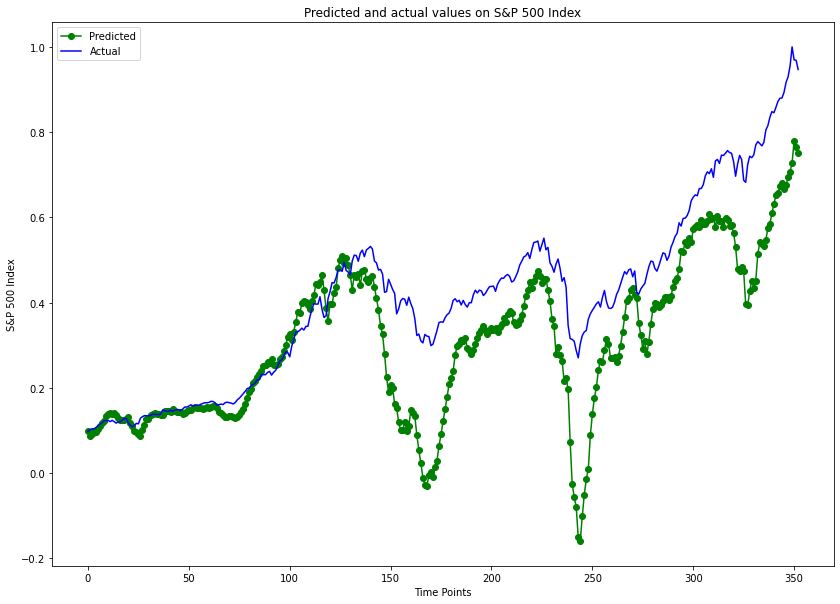

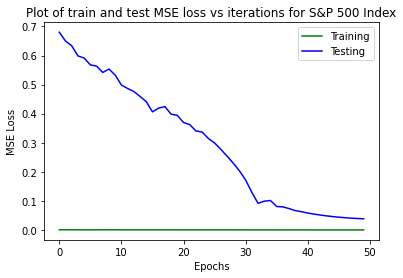

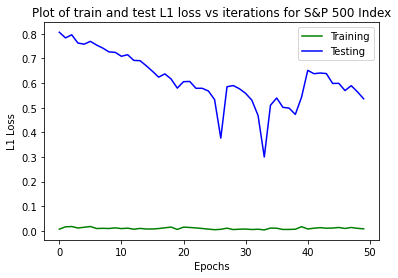

In [17]:
train.run(sp500_data, sp500_column_i, sp500_name, sp500_date, network, model_name)

## Bitcoin price

X_train.shape:  (2389, 5, 1)
y_train.shape:  (2389, 1)
X_test.shape:  (597, 5, 1)
y_test.shape:  (597, 1)
Starting Training of Bidirectional RNN model
Epoch 1/50 Done, Total Training MSE Loss: 0.0012844409263778507
Total Testing MSELoss: 0.10865567624568939
Total Time Elapsed: 0.46900159999995594 seconds

Epoch 2/50 Done, Total Training MSE Loss: 0.0040490165017257745
Total Testing MSELoss: 0.1698998510837555
Total Time Elapsed: 0.4694524999999885 seconds

Epoch 3/50 Done, Total Training MSE Loss: 0.0022549796580289536
Total Testing MSELoss: 0.1417950838804245
Total Time Elapsed: 0.45626320000008036 seconds

Epoch 4/50 Done, Total Training MSE Loss: 0.0017331018509295667
Total Testing MSELoss: 0.12103018164634705
Total Time Elapsed: 0.4572970000000396 seconds

Epoch 5/50 Done, Total Training MSE Loss: 0.0016844538237844088
Total Testing MSELoss: 0.10817990452051163
Total Time Elapsed: 0.4655811000000085 seconds

Epoch 6/50 Done, Total Training MSE Loss: 0.001528807903333216
Total Testi

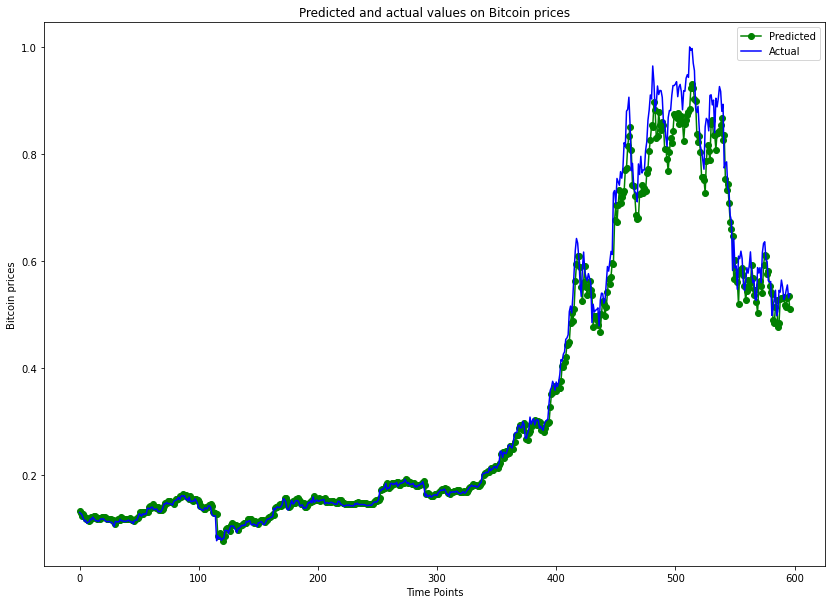

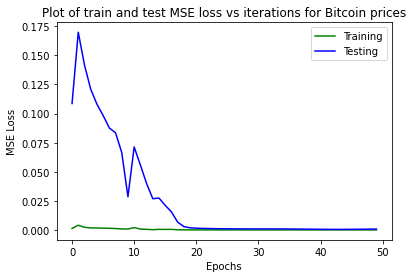

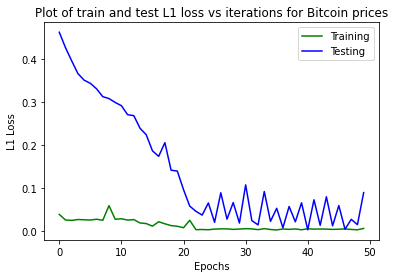

In [18]:
train.run(bitcoin_data, bitcoin_column_i, bitcoin_name, bitcoin_date, network, model_name)

# Gated Recurrent Unit (GRU)

In [19]:
class GRU(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.1):
        super(GRU, self).__init__()
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        
        self.gru = nn.GRU(input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
        
    def forward(self, x, h):
        out, h = self.gru(x, h)
        out = self.fc(out[:,-1])
        return out, h
    
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = weight.new(self.n_layers, batch_size, self.hidden_dim).zero_()
        return hidden

In [20]:
refresh_data()
network = GRU
model_name = "GRU"

## Artificial Data 1

X_train.shape:  (5842, 5, 1)
y_train.shape:  (5842, 1)
X_test.shape:  (1460, 5, 1)
y_test.shape:  (1460, 1)
Starting Training of GRU model


C:\Users\goodu\AppData\Local\Programs\Python\Python38\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch 1/50 Done, Total Training MSE Loss: 0.040419098785355594
Total Testing MSELoss: 0.017377391457557678
Total Time Elapsed: 1.2686079000000063 seconds

Epoch 2/50 Done, Total Training MSE Loss: 0.015697715021215718
Total Testing MSELoss: 0.009279253892600536
Total Time Elapsed: 1.2416544000000158 seconds

Epoch 3/50 Done, Total Training MSE Loss: 0.008032703857299947
Total Testing MSELoss: 0.0012582039926201105
Total Time Elapsed: 1.2703061999999363 seconds

Epoch 4/50 Done, Total Training MSE Loss: 0.0022512270903802005
Total Testing MSELoss: 0.000397017429349944
Total Time Elapsed: 1.2673302000000604 seconds

Epoch 5/50 Done, Total Training MSE Loss: 0.00036241511778636057
Total Testing MSELoss: 0.000475391250802204
Total Time Elapsed: 1.2377233999999362 seconds

Epoch 6/50 Done, Total Training MSE Loss: 0.00027216557834065867
Total Testing MSELoss: 0.00048134499229490757
Total Time Elapsed: 1.2686745999999403 seconds

Epoch 7/50 Done, Total Training MSE Loss: 0.000276786035541150

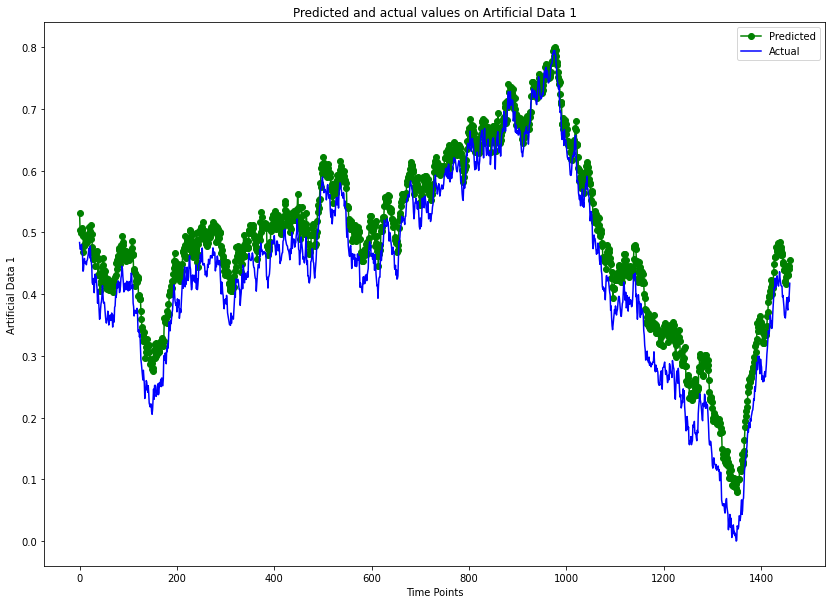

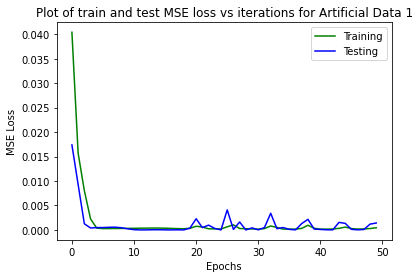

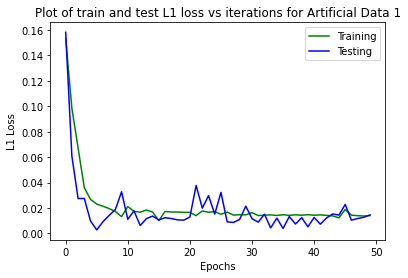

In [21]:
train.run(artificial_data1, artificial_data1_column_i, artificial_data1_name, artificial_data1_date, network, model_name)

## Artificial Data 2

X_train.shape:  (5842, 5, 1)
y_train.shape:  (5842, 1)
X_test.shape:  (1460, 5, 1)
y_test.shape:  (1460, 1)
Starting Training of GRU model


C:\Users\goodu\AppData\Local\Programs\Python\Python38\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch 1/50 Done, Total Training MSE Loss: 0.02909702647881644
Total Testing MSELoss: 0.12353704124689102
Total Time Elapsed: 1.2600183999999217 seconds

Epoch 2/50 Done, Total Training MSE Loss: 0.01228940540973921
Total Testing MSELoss: 0.050336334854364395
Total Time Elapsed: 1.2652557000000115 seconds

Epoch 3/50 Done, Total Training MSE Loss: 0.004348199972070518
Total Testing MSELoss: 0.001994406571611762
Total Time Elapsed: 1.2371155999999246 seconds

Epoch 4/50 Done, Total Training MSE Loss: 0.0004980723135484188
Total Testing MSELoss: 0.001995615428313613
Total Time Elapsed: 1.2500377999999728 seconds

Epoch 5/50 Done, Total Training MSE Loss: 0.0005437824716004747
Total Testing MSELoss: 0.0019022199558094144
Total Time Elapsed: 1.2704840000000104 seconds

Epoch 6/50 Done, Total Training MSE Loss: 0.0006168585838008017
Total Testing MSELoss: 0.0018785077845677733
Total Time Elapsed: 1.2677654000000302 seconds

Epoch 7/50 Done, Total Training MSE Loss: 0.0007265534288388074
Tota

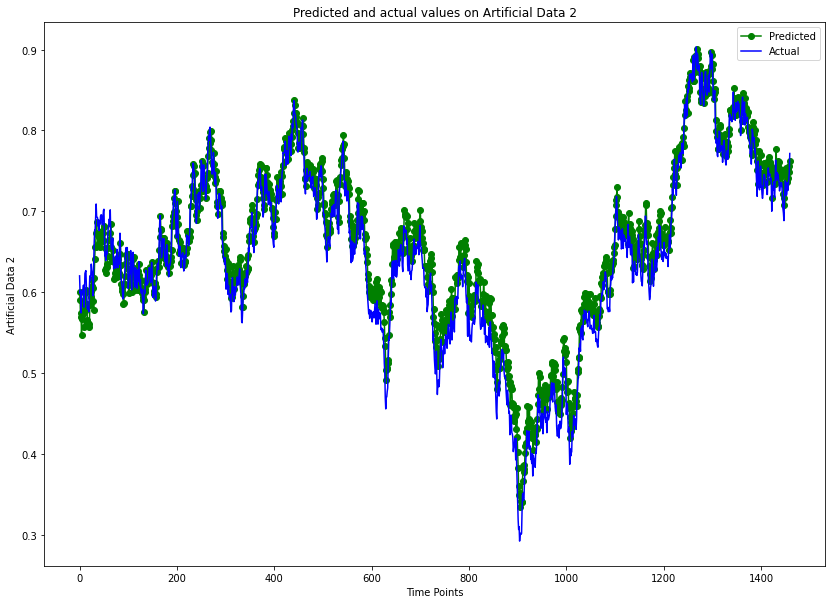

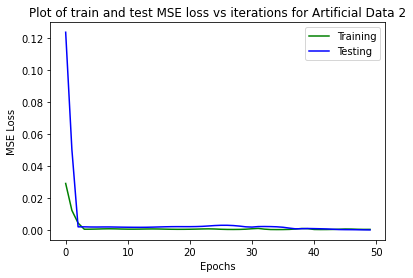

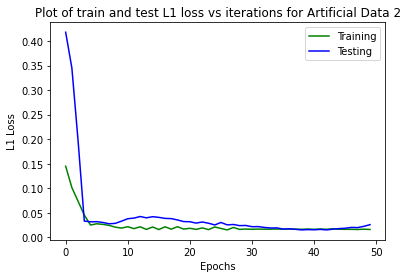

In [22]:
train.run(artificial_data2, artificial_data2_column_i, artificial_data2_name, artificial_data2_date, network, model_name)

## Microsoft Stock Price

X_train.shape:  (1205, 5, 1)
y_train.shape:  (1205, 1)
X_test.shape:  (301, 5, 1)
y_test.shape:  (301, 1)
Starting Training of GRU model
Epoch 1/50 Done, Total Training MSE Loss: 0.007328414117403775


C:\Users\goodu\AppData\Local\Programs\Python\Python38\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Total Testing MSELoss: 0.14007805287837982
Total Time Elapsed: 0.2853684000000385 seconds

Epoch 2/50 Done, Total Training MSE Loss: 0.04248631052945023
Total Testing MSELoss: 0.3140213191509247
Total Time Elapsed: 0.2881091000000424 seconds

Epoch 3/50 Done, Total Training MSE Loss: 0.013474925004088987
Total Testing MSELoss: 0.14121615886688232
Total Time Elapsed: 0.25860550000004423 seconds

Epoch 4/50 Done, Total Training MSE Loss: 0.007134231535412648
Total Testing MSELoss: 0.0001806387590477243
Total Time Elapsed: 0.26337339999997766 seconds

Epoch 5/50 Done, Total Training MSE Loss: 0.001525097877478205
Total Testing MSELoss: 0.00015977711882442236
Total Time Elapsed: 0.2535617999999431 seconds

Epoch 6/50 Done, Total Training MSE Loss: 0.0009453640325503058
Total Testing MSELoss: 7.883991929702461e-05
Total Time Elapsed: 0.2667893999999933 seconds

Epoch 7/50 Done, Total Training MSE Loss: 0.0004372510581094035
Total Testing MSELoss: 0.0012565786018967628
Total Time Elapsed: 0.

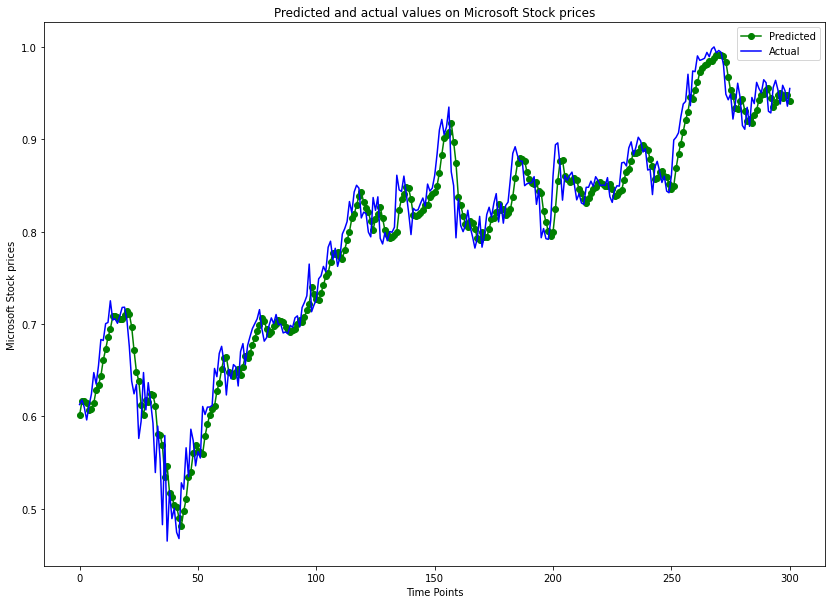

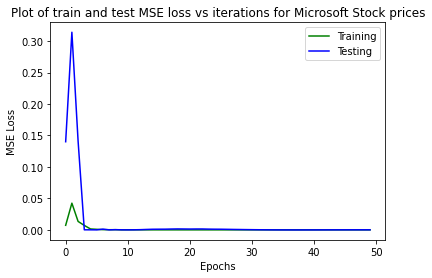

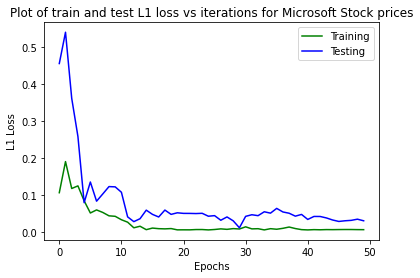

In [23]:
train.run(msft_data, msft_column_i, msft_name, msft_date, network, model_name)

## Crude oil price

X_train.shape:  (1219, 5, 1)
y_train.shape:  (1219, 1)
X_test.shape:  (305, 5, 1)
y_test.shape:  (305, 1)
Starting Training of GRU model
Epoch 1/50 Done, Total Training MSE Loss: 0.029412007931233875


C:\Users\goodu\AppData\Local\Programs\Python\Python38\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Total Testing MSELoss: 0.14481323957443237
Total Time Elapsed: 0.2785053000000062 seconds

Epoch 2/50 Done, Total Training MSE Loss: 0.032585422600325396
Total Testing MSELoss: 0.052461735904216766
Total Time Elapsed: 0.2661382000000003 seconds

Epoch 3/50 Done, Total Training MSE Loss: 0.03657729397711687
Total Testing MSELoss: 0.012565435841679573
Total Time Elapsed: 0.2907588000000487 seconds

Epoch 4/50 Done, Total Training MSE Loss: 0.027179277995233668
Total Testing MSELoss: 0.011340034194290638
Total Time Elapsed: 0.29401800000005096 seconds

Epoch 5/50 Done, Total Training MSE Loss: 0.02029748180403227
Total Testing MSELoss: 0.008081327192485332
Total Time Elapsed: 0.2932338000000527 seconds

Epoch 6/50 Done, Total Training MSE Loss: 0.015934480397079728
Total Testing MSELoss: 0.0053084236569702625
Total Time Elapsed: 0.2935417999999572 seconds

Epoch 7/50 Done, Total Training MSE Loss: 0.011770317061746027
Total Testing MSELoss: 0.004308793693780899
Total Time Elapsed: 0.29312

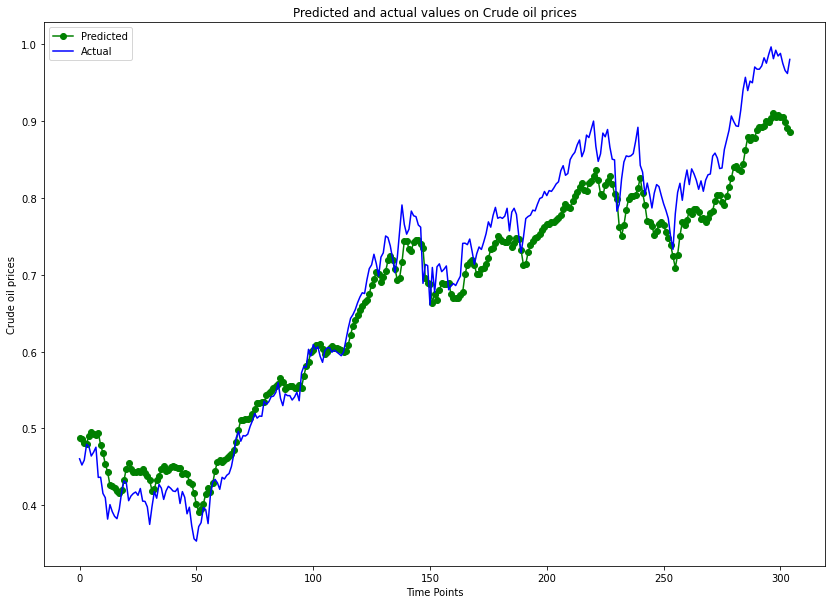

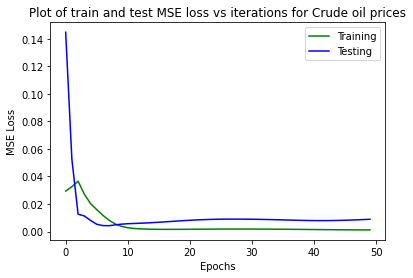

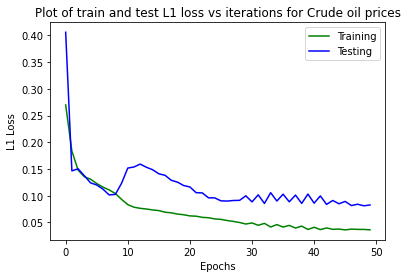

In [24]:
train.run(oil_data, oil_column_i, oil_name, oil_date, network, model_name)

## S&P 500 Index

X_train.shape:  (1410, 5, 1)
y_train.shape:  (1410, 1)
X_test.shape:  (353, 5, 1)
y_test.shape:  (353, 1)
Starting Training of GRU model
Epoch 1/50 Done, Total Training MSE Loss: 0.00015299462980111755


C:\Users\goodu\AppData\Local\Programs\Python\Python38\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Total Testing MSELoss: 0.6477124094963074
Total Time Elapsed: 0.31935699999996814 seconds

Epoch 2/50 Done, Total Training MSE Loss: 0.00043150009117518743
Total Testing MSELoss: 0.597375214099884
Total Time Elapsed: 0.31815629999994144 seconds

Epoch 3/50 Done, Total Training MSE Loss: 0.0005674667579446628
Total Testing MSELoss: 0.5916572213172913
Total Time Elapsed: 0.3079983000000084 seconds

Epoch 4/50 Done, Total Training MSE Loss: 0.0003868451952519856
Total Testing MSELoss: 0.5470421314239502
Total Time Elapsed: 0.30662100000006376 seconds

Epoch 5/50 Done, Total Training MSE Loss: 0.00035249387776497605
Total Testing MSELoss: 0.5232501029968262
Total Time Elapsed: 0.29944829999999456 seconds

Epoch 6/50 Done, Total Training MSE Loss: 0.0003452124990462576
Total Testing MSELoss: 0.4907657504081726
Total Time Elapsed: 0.3136968999999681 seconds

Epoch 7/50 Done, Total Training MSE Loss: 0.0003213731171456402
Total Testing MSELoss: 0.4686488211154938
Total Time Elapsed: 0.3099157

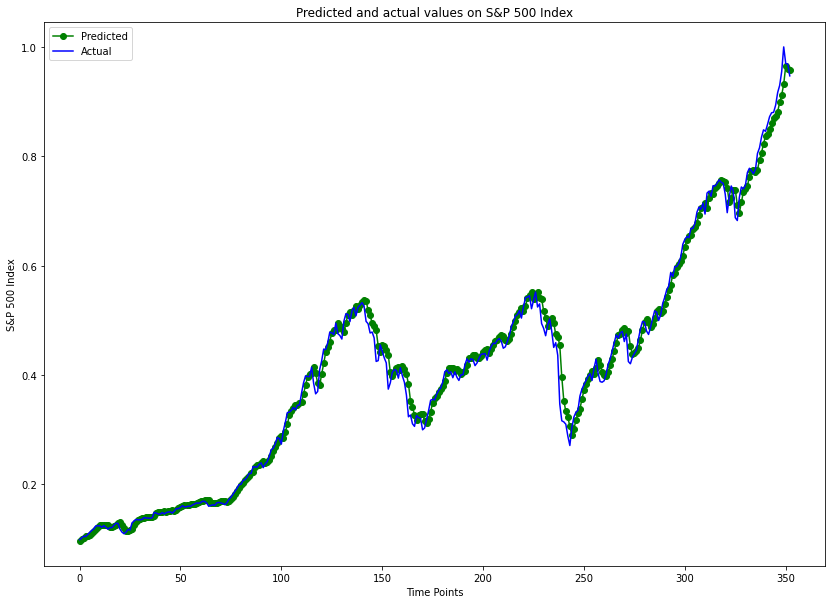

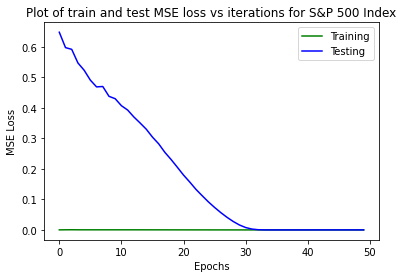

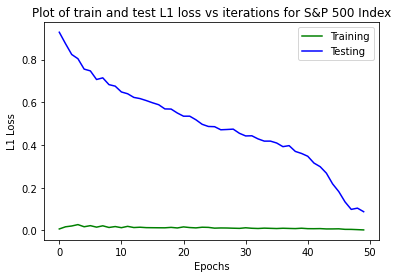

In [25]:
train.run(sp500_data, sp500_column_i, sp500_name, sp500_date, network, model_name)

## Bitcoin price

X_train.shape:  (2389, 5, 1)
y_train.shape:  (2389, 1)
X_test.shape:  (597, 5, 1)
y_test.shape:  (597, 1)
Starting Training of GRU model
Epoch 1/50 Done, Total Training MSE Loss: 0.0031766640717899317


C:\Users\goodu\AppData\Local\Programs\Python\Python38\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Total Testing MSELoss: 0.2007559835910797
Total Time Elapsed: 0.5072480000000041 seconds

Epoch 2/50 Done, Total Training MSE Loss: 0.0022563421664228227
Total Testing MSELoss: 0.15529868006706238
Total Time Elapsed: 0.5175496000000521 seconds

Epoch 3/50 Done, Total Training MSE Loss: 0.0023217512318338806
Total Testing MSELoss: 0.13093869388103485
Total Time Elapsed: 0.5125381999999945 seconds

Epoch 4/50 Done, Total Training MSE Loss: 0.0023475095822969687
Total Testing MSELoss: 0.11789711564779282
Total Time Elapsed: 0.5138090000000375 seconds

Epoch 5/50 Done, Total Training MSE Loss: 0.0023180968182791237
Total Testing MSELoss: 0.10887511074542999
Total Time Elapsed: 0.5120560999999952 seconds

Epoch 6/50 Done, Total Training MSE Loss: 0.0020776826897188866
Total Testing MSELoss: 0.09473397582769394
Total Time Elapsed: 0.5111189999998942 seconds

Epoch 7/50 Done, Total Training MSE Loss: 0.002043692064946016
Total Testing MSELoss: 0.08364414423704147
Total Time Elapsed: 0.5061930

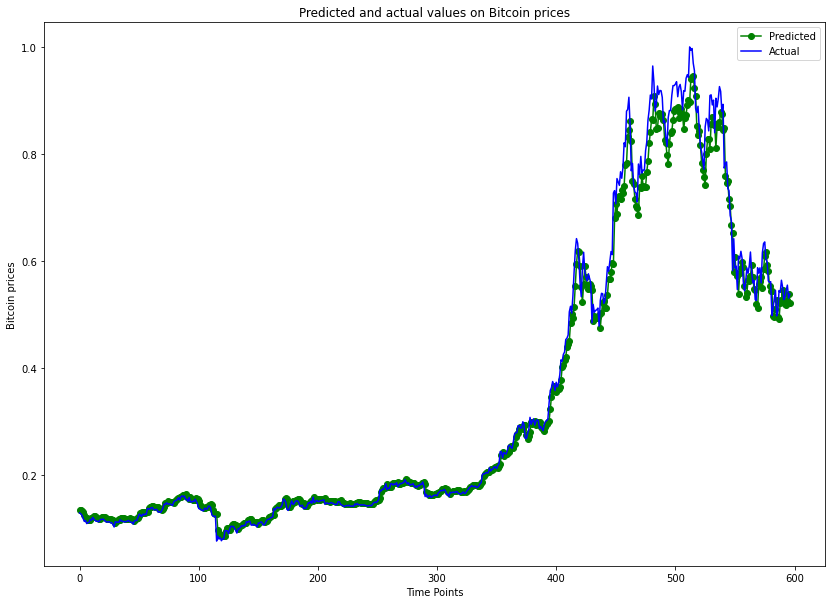

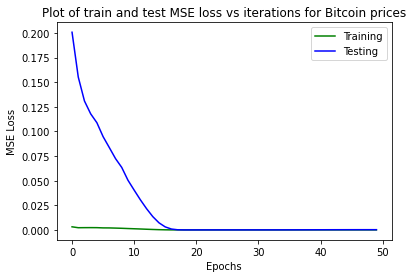

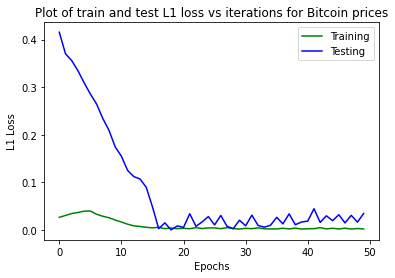

In [26]:
train.run(bitcoin_data, bitcoin_column_i, bitcoin_name, bitcoin_date, network, model_name)

# Long-Short Term Memory (LSTM)

In [27]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
    def forward(self, x, ph):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out, hn

    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = weight.new(0, 0, 0).zero_()
        return hidden

In [28]:
refresh_data()
network = LSTM
model_name = "LSTM"

## Artificial Data 1

X_train.shape:  (5842, 5, 1)
y_train.shape:  (5842, 1)
X_test.shape:  (1460, 5, 1)
y_test.shape:  (1460, 1)
Starting Training of LSTM model
Epoch 1/50 Done, Total Training MSE Loss: 0.049946864866037534
Total Testing MSELoss: 0.011172549799084663
Total Time Elapsed: 1.2064298000000235 seconds

Epoch 2/50 Done, Total Training MSE Loss: 0.012317289017648744
Total Testing MSELoss: 0.0013171342434361577
Total Time Elapsed: 1.220935499999996 seconds

Epoch 3/50 Done, Total Training MSE Loss: 0.005133321608389871
Total Testing MSELoss: 0.00027278909692540765
Total Time Elapsed: 1.2263567999999623 seconds

Epoch 4/50 Done, Total Training MSE Loss: 0.0009861247345215416
Total Testing MSELoss: 0.00016073162259999663
Total Time Elapsed: 1.2424800000000005 seconds

Epoch 5/50 Done, Total Training MSE Loss: 0.0006673973733556052
Total Testing MSELoss: 6.450047294492833e-06
Total Time Elapsed: 1.2292394000000968 seconds

Epoch 6/50 Done, Total Training MSE Loss: 0.0008245655960738556
Total Testing 

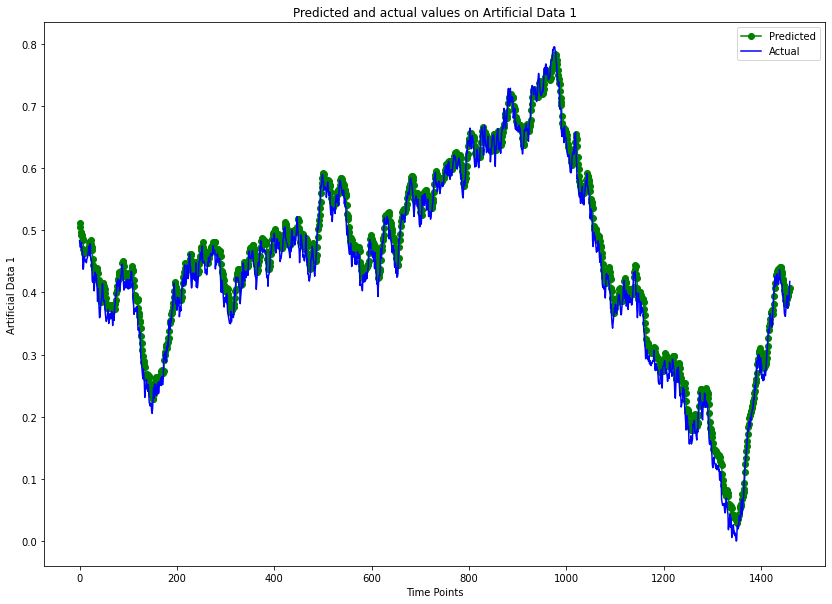

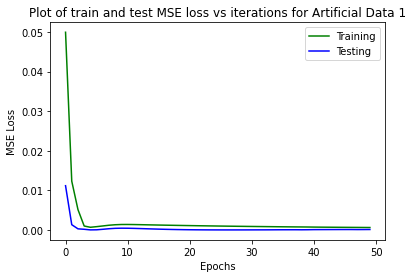

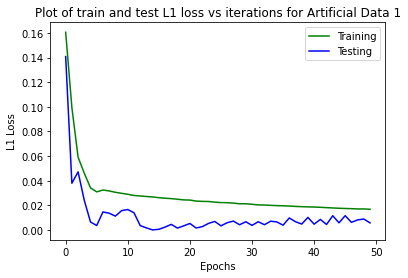

In [29]:
train.run(artificial_data1, artificial_data1_column_i, artificial_data1_name, artificial_data1_date, network, model_name)

## Artificial Data 2

X_train.shape:  (5842, 5, 1)
y_train.shape:  (5842, 1)
X_test.shape:  (1460, 5, 1)
y_test.shape:  (1460, 1)
Starting Training of LSTM model
Epoch 1/50 Done, Total Training MSE Loss: 0.045485994878358076
Total Testing MSELoss: 0.1818021684885025
Total Time Elapsed: 1.2192305999999462 seconds

Epoch 2/50 Done, Total Training MSE Loss: 0.024064246658011913
Total Testing MSELoss: 0.13779553771018982
Total Time Elapsed: 1.2248811000001751 seconds

Epoch 3/50 Done, Total Training MSE Loss: 0.014239501214543341
Total Testing MSELoss: 0.06882569193840027
Total Time Elapsed: 1.224948399999903 seconds

Epoch 4/50 Done, Total Training MSE Loss: 0.005033135562601044
Total Testing MSELoss: 0.000455034984042868
Total Time Elapsed: 1.2095420000000559 seconds

Epoch 5/50 Done, Total Training MSE Loss: 0.0006707339714841589
Total Testing MSELoss: 0.0013149827718734741
Total Time Elapsed: 1.3074169999999867 seconds

Epoch 6/50 Done, Total Training MSE Loss: 0.0009997082019613667
Total Testing MSELoss: 0

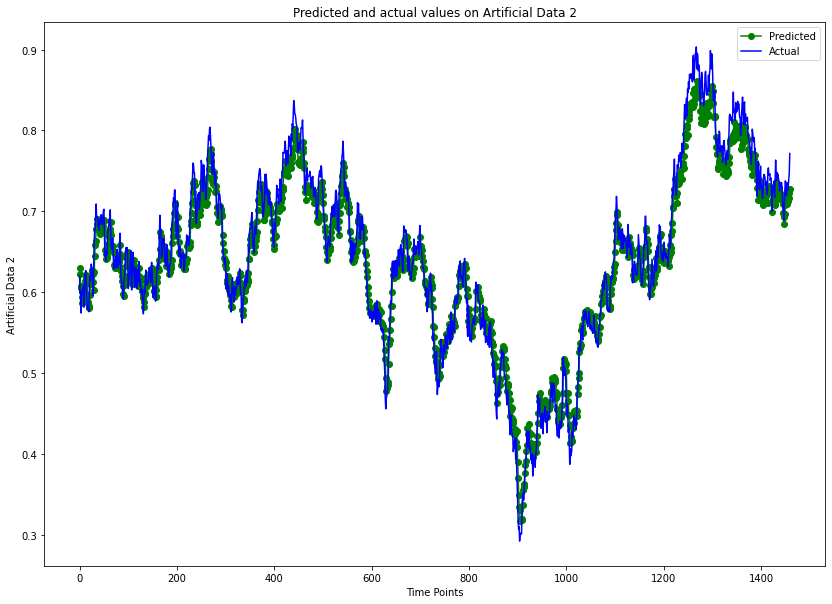

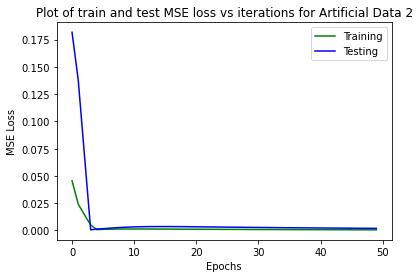

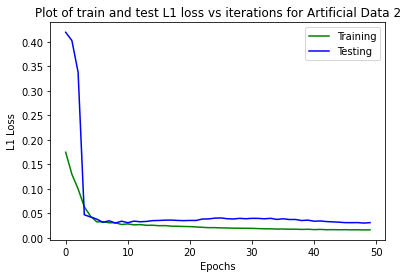

In [30]:
train.run(artificial_data2, artificial_data2_column_i, artificial_data2_name, artificial_data2_date, network, model_name)

## Microsoft Stock Price

X_train.shape:  (1205, 5, 1)
y_train.shape:  (1205, 1)
X_test.shape:  (301, 5, 1)
y_test.shape:  (301, 1)
Starting Training of LSTM model
Epoch 1/50 Done, Total Training MSE Loss: 0.0009469544112672904
Total Testing MSELoss: 0.12237074971199036
Total Time Elapsed: 0.26043650000019625 seconds

Epoch 2/50 Done, Total Training MSE Loss: 0.04766133796373332
Total Testing MSELoss: 0.43222665786743164
Total Time Elapsed: 0.2569654999999784 seconds

Epoch 3/50 Done, Total Training MSE Loss: 0.016724312498636946
Total Testing MSELoss: 0.29377102851867676
Total Time Elapsed: 0.27096529999994345 seconds

Epoch 4/50 Done, Total Training MSE Loss: 0.016707438357312837
Total Testing MSELoss: 0.18426339328289032
Total Time Elapsed: 0.26531339999996817 seconds

Epoch 5/50 Done, Total Training MSE Loss: 0.01086865637409721
Total Testing MSELoss: 0.020872969180345535
Total Time Elapsed: 0.26466290000007575 seconds

Epoch 6/50 Done, Total Training MSE Loss: 0.005332110809635
Total Testing MSELoss: 0.010

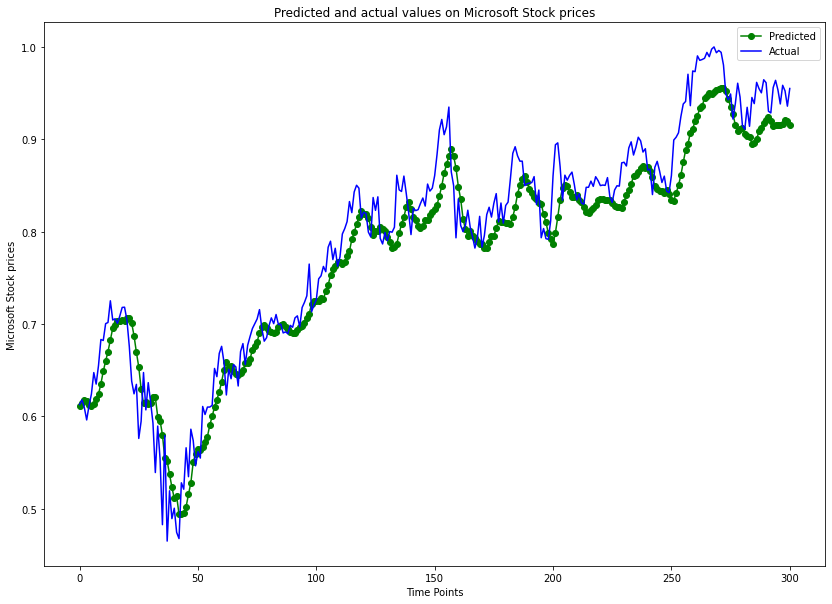

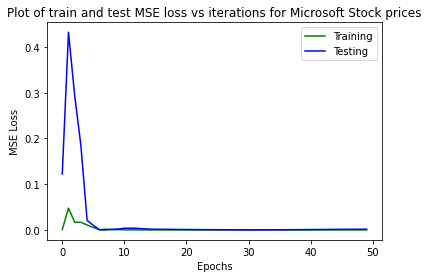

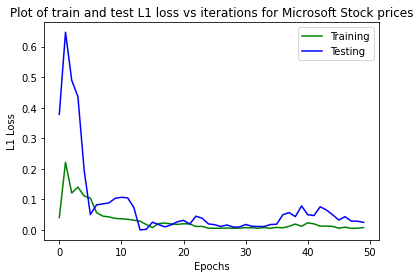

In [31]:
train.run(msft_data, msft_column_i, msft_name, msft_date, network, model_name)

## Crude oil price

X_train.shape:  (1219, 5, 1)
y_train.shape:  (1219, 1)
X_test.shape:  (305, 5, 1)
y_test.shape:  (305, 1)
Starting Training of LSTM model
Epoch 1/50 Done, Total Training MSE Loss: 0.09751768087612857
Total Testing MSELoss: 0.030693823471665382
Total Time Elapsed: 0.27325740000014775 seconds

Epoch 2/50 Done, Total Training MSE Loss: 0.04753126370058836
Total Testing MSELoss: 0.03201126679778099
Total Time Elapsed: 0.2560045000000173 seconds

Epoch 3/50 Done, Total Training MSE Loss: 0.03356880500704344
Total Testing MSELoss: 0.023576879873871803
Total Time Elapsed: 0.26681090000010954 seconds

Epoch 4/50 Done, Total Training MSE Loss: 0.031307322662446256
Total Testing MSELoss: 0.01599142700433731
Total Time Elapsed: 0.27035750000004555 seconds

Epoch 5/50 Done, Total Training MSE Loss: 0.027644999227241465
Total Testing MSELoss: 0.010681749321520329
Total Time Elapsed: 0.2740388999998231 seconds

Epoch 6/50 Done, Total Training MSE Loss: 0.023811862568101406
Total Testing MSELoss: 0.0

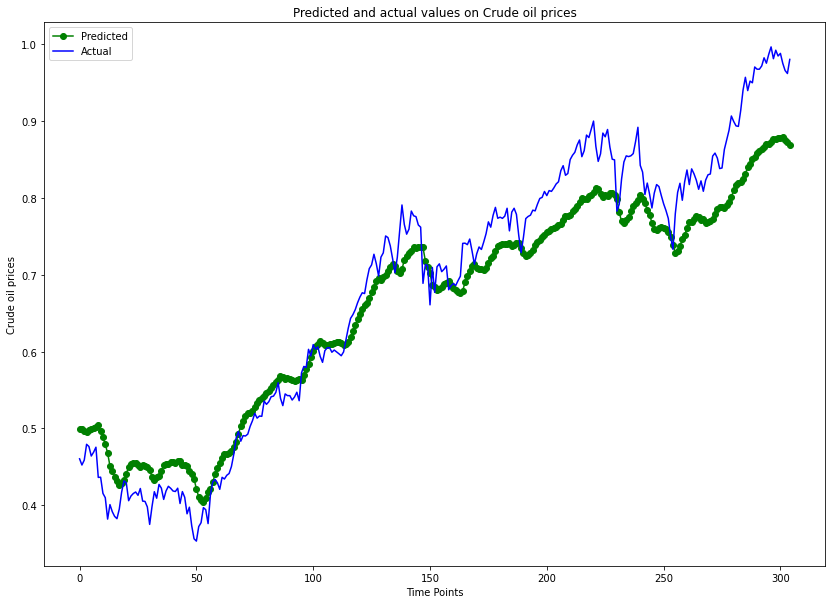

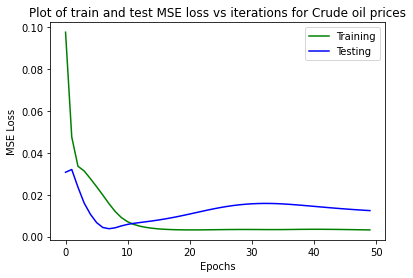

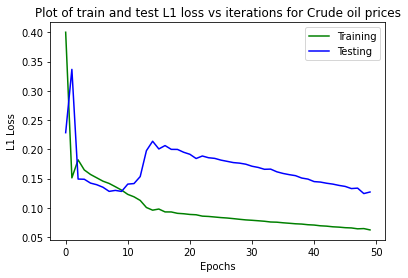

In [32]:
train.run(oil_data, oil_column_i, oil_name, oil_date, network, model_name)

## S&P 500 Index

X_train.shape:  (1410, 5, 1)
y_train.shape:  (1410, 1)
X_test.shape:  (353, 5, 1)
y_test.shape:  (353, 1)
Starting Training of LSTM model
Epoch 1/50 Done, Total Training MSE Loss: 0.0022592393386586
Total Testing MSELoss: 0.7821399569511414
Total Time Elapsed: 0.30314799999996467 seconds

Epoch 2/50 Done, Total Training MSE Loss: 0.0005146877207401378
Total Testing MSELoss: 0.7040432095527649
Total Time Elapsed: 0.29329759999995986 seconds

Epoch 3/50 Done, Total Training MSE Loss: 0.000584097002994161
Total Testing MSELoss: 0.6748499870300293
Total Time Elapsed: 0.301537000000053 seconds

Epoch 4/50 Done, Total Training MSE Loss: 0.0005624386648357606
Total Testing MSELoss: 0.6506777405738831
Total Time Elapsed: 0.3086003000000801 seconds

Epoch 5/50 Done, Total Training MSE Loss: 0.0005550926119751216
Total Testing MSELoss: 0.6302489042282104
Total Time Elapsed: 0.3140481999998883 seconds

Epoch 6/50 Done, Total Training MSE Loss: 0.0005495475159869236
Total Testing MSELoss: 0.609560

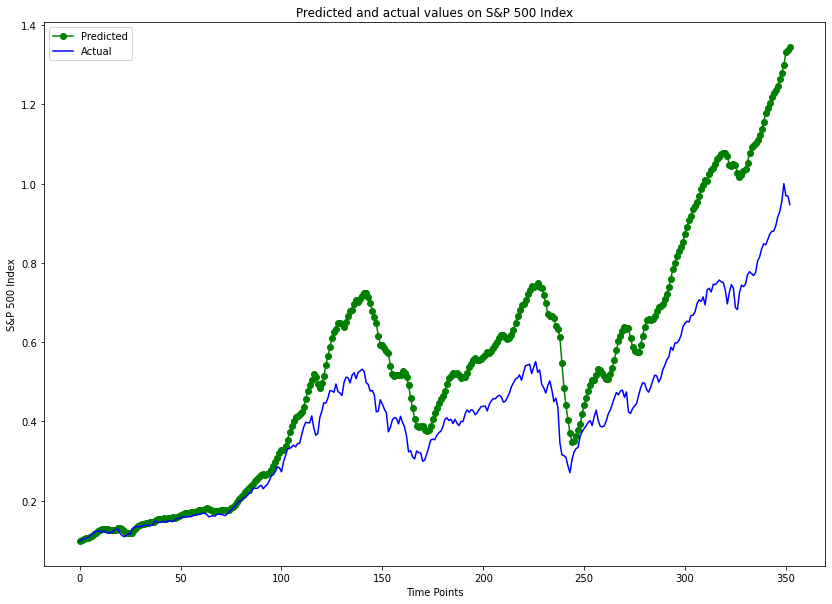

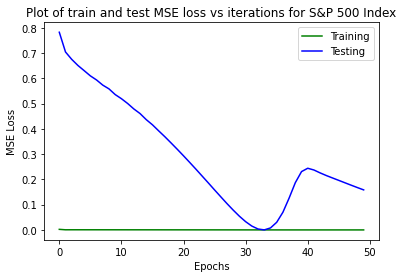

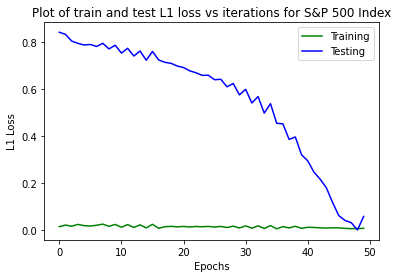

In [33]:
train.run(sp500_data, sp500_column_i, sp500_name, sp500_date, network, model_name)

## Bitcoin price

X_train.shape:  (2389, 5, 1)
y_train.shape:  (2389, 1)
X_test.shape:  (597, 5, 1)
y_test.shape:  (597, 1)
Starting Training of LSTM model
Epoch 1/50 Done, Total Training MSE Loss: 0.002020495076675566
Total Testing MSELoss: 0.18930548429489136
Total Time Elapsed: 0.5065148999999565 seconds

Epoch 2/50 Done, Total Training MSE Loss: 0.0023663253724099283
Total Testing MSELoss: 0.14767906069755554
Total Time Elapsed: 0.5173849000000246 seconds

Epoch 3/50 Done, Total Training MSE Loss: 0.003397524933755117
Total Testing MSELoss: 0.14504840970039368
Total Time Elapsed: 0.49925310000003265 seconds

Epoch 4/50 Done, Total Training MSE Loss: 0.003584813641761709
Total Testing MSELoss: 0.13633310794830322
Total Time Elapsed: 0.5219108000001142 seconds

Epoch 5/50 Done, Total Training MSE Loss: 0.003987064188301112
Total Testing MSELoss: 0.1426631510257721
Total Time Elapsed: 0.5075018 seconds

Epoch 6/50 Done, Total Training MSE Loss: 0.0036001346998705843
Total Testing MSELoss: 0.13483113050

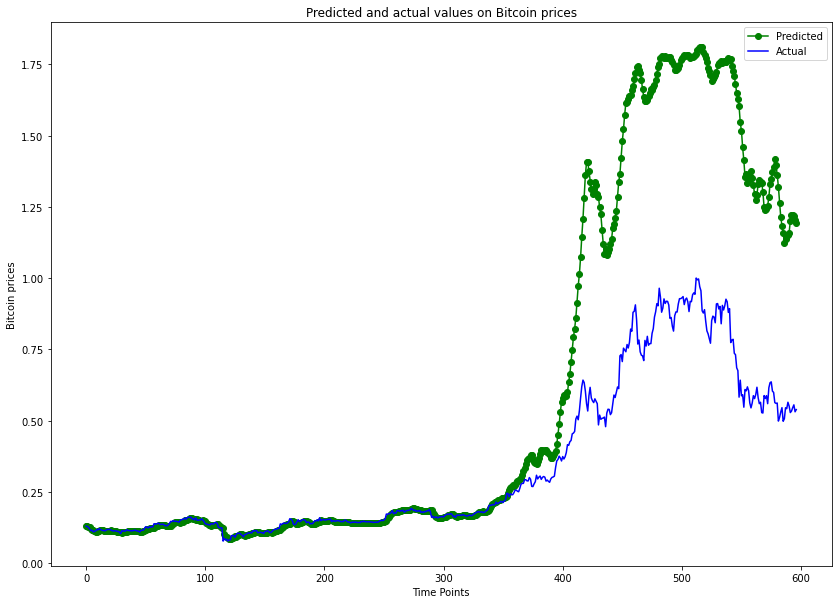

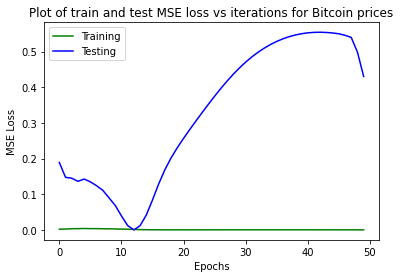

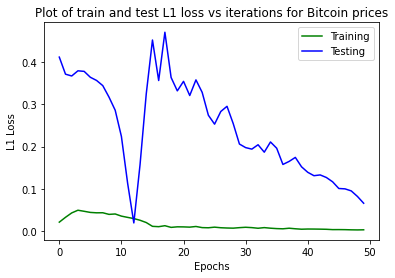

In [34]:
train.run(bitcoin_data, bitcoin_column_i, bitcoin_name, bitcoin_date, network, model_name)